1. IMPORT

In [23]:
import  cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from IPython.display import clear_output, display


2. KEYPOINTS USING MP

In [24]:
# holistic model
mp_holistic = mp.solutions.holistic
# drawaing utilities
mp_drawing = mp.solutions.drawing_utils

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

In [25]:
def mediapipe_detection(image, model):
    # color convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image is no longer wrtieable 
    image.flags.writeable = False
    # make predictions
    results = model.process(image)
    # makes the image writeable again
    image.flags.writeable = True
    # color convert RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [26]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [27]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # read the feed
            ret, frame = cap.read()

            # make detections
            image, results = mediapipe_detection(frame, holistic)

            # draw landmarks
            draw_styled_landmarks(image, results)

            #show to screen
            cv2.imshow('OpenCV feed', image)

            # PRESS 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1747251551.221524 3919314 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1747251551.300717 3925044 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747251551.312857 3925048 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747251551.315000 3925043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747251551.315008 3925046 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747251551.315026 3925048 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

Interrupted manually.


In [28]:
len(results.left_hand_landmarks.landmark)

21

In [29]:
results

mediapipe.python.solution_base.SolutionOutputs

In [30]:
draw_styled_landmarks(frame, results)

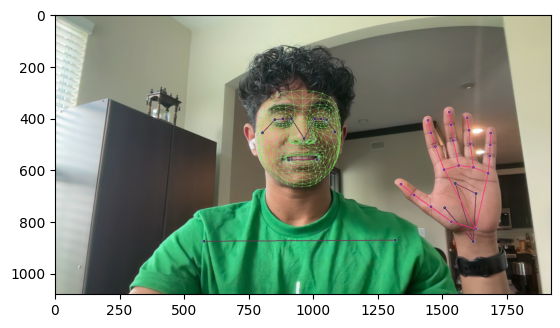

In [31]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

3. EXTRACT KEY POINTS

In [32]:
results.pose_landmarks

landmark {
  x: 0.50114876
  y: 0.444492757
  z: -0.623574674
  visibility: 0.999996424
}
landmark {
  x: 0.522579551
  y: 0.373149067
  z: -0.567303121
  visibility: 0.999994755
}
landmark {
  x: 0.534485519
  y: 0.374793053
  z: -0.56713593
  visibility: 0.999993742
}
landmark {
  x: 0.546513677
  y: 0.376978636
  z: -0.566660464
  visibility: 0.999994397
}
landmark {
  x: 0.475651592
  y: 0.373959035
  z: -0.572388887
  visibility: 0.99999404
}
landmark {
  x: 0.458742261
  y: 0.374928653
  z: -0.571525037
  visibility: 0.999991417
}
landmark {
  x: 0.442619145
  y: 0.377757698
  z: -0.571723044
  visibility: 0.999992
}
landmark {
  x: 0.563126504
  y: 0.420984983
  z: -0.25255698
  visibility: 0.999993742
}
landmark {
  x: 0.417195618
  y: 0.424860805
  z: -0.270861715
  visibility: 0.999994218
}
landmark {
  x: 0.52723223
  y: 0.519666433
  z: -0.507879376
  visibility: 0.999992073
}
landmark {
  x: 0.469799608
  y: 0.521355629
  z: -0.51521337
  visibility: 0.999993563
}
landmark

In [33]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [50]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [54]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose,face,lh, rh])


last timestamp 31.20

In [56]:
extract_keypoints(results).shape

(1662,)

In [58]:
468*3+33*4+21*3+21*3

1662

4. SET UP FOLDERS FOR COLECTION

In [ ]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 video worth of data
no_sequence = 30
# each video has 30 frames in it
sequence_length = 30

In [ ]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except:
            pass


5. COLLECT KEY POINTS FOR TRININGS AND TESTING

6. PREPROCESS DATA

7. BUILD AND TRAIN LSTM NEURAL NET

8. MAKE PREDICITIONS 

9. SAVE WEIGHTS

10. EVAL USING CONFUSION MATRIX AND ACCURACY

11. TEST